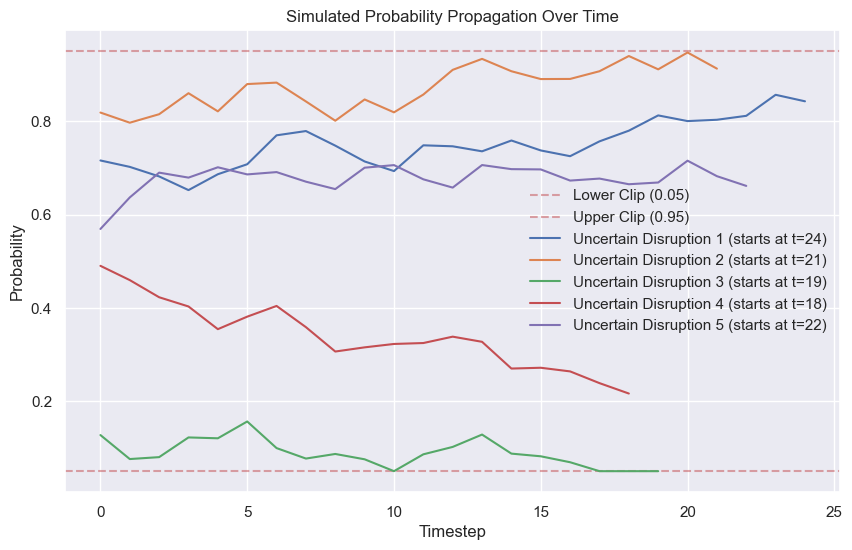

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid')

# Initialize parameters
n_positions = 5  # Number of starting positions 
n_timesteps = 25  # Number of timesteps
start_probs = np.random.uniform(0.1, 0.9, n_positions)  # Random initial probabilities
stop_timesteps = np.random.randint(n_timesteps/2, n_timesteps, n_positions)  # Random stop points

# Function to propagate probabilities over time
def propagate_probabilities(start_probs, n_timesteps, stop_timesteps):
    probabilities = [start_probs]
    for t in range(1, n_timesteps):
        current_probs = probabilities[-1].copy()
        new_probs = []
        for i, prob in enumerate(current_probs):
            if t <= stop_timesteps[i]:
                random_variation = np.random.uniform(-0.05, 0.05)  # Random adjustment
                bias = 0.05 * (1 - prob) if prob > 0.5 else -0.05 * prob  # Bias toward extremes
                progression = random_variation + bias
                new_prob = prob + progression
                new_prob = max(0.05, min(0.95, new_prob))  # Cap probabilities
            else:
                new_prob = np.nan  # Use nan after stop point
            new_probs.append(new_prob)
        probabilities.append(new_probs)
    return np.array(probabilities)

# Generate probability progression
prob_progression = propagate_probabilities(start_probs, n_timesteps, stop_timesteps)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot clip lines
plt.axhline(y=0.05, color='r', linestyle='--', alpha=0.5, label='Lower Clip (0.05)')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='Upper Clip (0.95)')

# Plot probability progressions
for i in range(n_positions):
    # Only plot non-nan values
    data = prob_progression[:, i]
    timesteps = range(n_timesteps)
    plt.plot(timesteps, data, 
             label=f"Uncertain Disruption {i+1} (starts at t={stop_timesteps[i]})")

plt.xlabel("Timestep")
plt.ylabel("Probability")
plt.title("Simulated Probability Propagation Over Time")
plt.legend(frameon=False)
plt.grid(True)
plt.show()


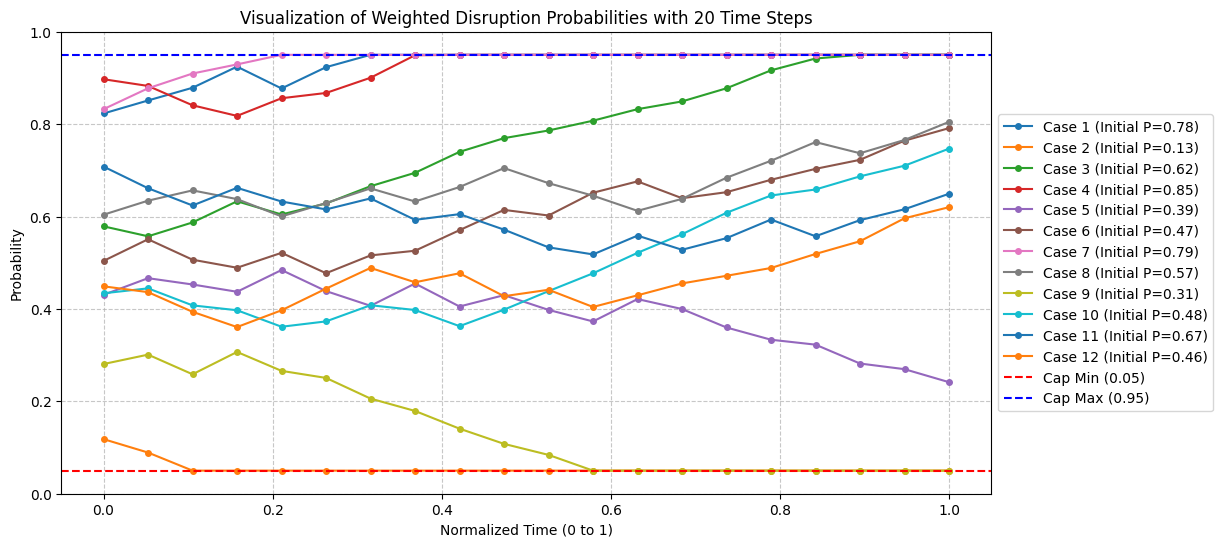

In [1]:
## OLD

import matplotlib.pyplot as plt
import numpy as np

# Parameters for simulation
time_steps_medium = 20  # Set to 20 time steps
time_medium = np.linspace(0, 1, time_steps_medium)  # Normalized time
num_cases = 12  # Number of cases to simulate
cap_min, cap_max = 0.05, 0.95  # Define caps for probabilities

# Initialize random probabilities for initial cases
np.random.seed(None)  # Use a new seed each run
initial_probs = np.random.uniform(0.1, 0.9, num_cases)

# Simulate probabilities over time
capped_probs_medium = []
for initial_prob in initial_probs:
    probs = []
    current_prob = initial_prob
    for t in time_medium:
        if current_prob == 0.00 or current_prob == 1.00:
            probs.append(current_prob)  # Lock the value if resolved
            continue

        # Calculate the likelihood of moving up or down
        up_prob = current_prob  # Higher values have higher likelihood of moving up
        down_prob = 1 - current_prob  # Lower values have higher likelihood of moving down
        direction = np.random.choice([-1, 1], p=[down_prob, up_prob])  # Choose direction based on weights

        # Apply a random variation in the chosen direction
        random_variation = np.random.uniform(0.01, 0.05)  # Small random step size
        progression = direction * random_variation
        current_prob = current_prob + progression

        # Cap probabilities at [cap_min, cap_max]
        current_prob = max(cap_min, min(cap_max, current_prob))
        probs.append(current_prob)
    capped_probs_medium.append(probs)

# Plot the updated results with 20 time steps
plt.figure(figsize=(12, 6))
for i, probs in enumerate(capped_probs_medium):
    plt.plot(time_medium, probs, marker="o", markersize=4, label=f"Case {i+1} (Initial P={initial_probs[i]:.2f})")  # Reduced marker size

plt.axhline(y=cap_min, color="red", linestyle="--", label="Cap Min (0.05)")
plt.axhline(y=cap_max, color="blue", linestyle="--", label="Cap Max (0.95)")
plt.title("Visualization of Weighted Disruption Probabilities with 20 Time Steps")
plt.xlabel("Normalized Time (0 to 1)")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside the plot on the right side
plt.show()
